<a href="https://colab.research.google.com/github/prasoongi/play-store-aap-review-analysis/blob/main/Copy_of_pk_final_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##**Lets import some of the package**


In [ ]:
import pandas as pd               # To manipulate data
import numpy as np                # To do mathematical operation
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization
import plotly.express as px       # for data visualization in more efective way

##**Lets first mount the drive so to connect dataset with the notebook**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1="/content/drive/MyDrive/Play Store Data.csv"
play_df=pd.read_csv(path1)

In [ ]:
path2='/content/drive/MyDrive/User Reviews.csv'
user_df=pd.read_csv(path2)

##**Lets Start playing with the Dataset.**

In [ ]:
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##**Lets understand what the columns in the data set means**
1.  **App**        -   Name of the Application
2.  **Category**   -   Category of the Application
3.  **Rating**     -   Rating given to the Application
4.  **Reviews**    -   No of reviews given to the Application
5.  **Size**       -   Size of the Application
6.  **Installs**   -   No of downloads of the Application
7.  **Type**       -   Free or Paid
8.  **Price**      -   Price of the Application if it is paid
9.  **Content Rating**-It is Age appropriate or Not
10. **Genres**    - Type of Genre the Application belongs to
11. **Last Updated** - When the last time the Application is Updated
12. **Current Ver**  - Current version of the Application
13. **Android Version**- Minimum Android version required to run the Application

In [ ]:
play_df.shape

(10841, 13)

In [ ]:
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#Getting shape of the dataframe
user_df.shape

(64295, 5)

##**Let's start with play store data which is play_df**

First we have to do some Data Cleaning

1. Lets try to find out missing values in our dataset

In [ ]:
#counting the null values if it is null then sum up the true null value
empty_count = play_df.isnull().sum()

In [ ]:
empty_count[0:]

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As there are 1474 missing values in rating so the possible way here is to get the median, mean or mode of column Rating and replace that value with the missing values.



In [ ]:
play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#finding the mean of the rating column
mean_rating=play_df['Rating'].mean()

In [ ]:
mean_rating

4.193338315362448

In [ ]:
#Finding the median of the rating column
median_rating=play_df['Rating'].median()
median_rating

4.3

In [ ]:
#Finding the mode of the rating column
mode_rating=play_df['Rating'].mode()

In [ ]:
mode_rating

0    4.4
dtype: float64

Based on our findings on mean,mode and median we got mean_rating lowest so we have decided to replace the null values with the mean value

In [ ]:
#Replacing the missing rating value with the lowest rating
play_df['Rating']=play_df['Rating'].fillna(mean_rating)

In [ ]:
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


let's remove all the rows having the missing values

In [ ]:
#lets the drop the null values of the rows if exists
not_null_df1=play_df.dropna()

In [ ]:
#Finding the shape
not_null_df1.shape

(10829, 13)

In [ ]:

not_null_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


As we can see above there is no missing value

In [ ]:
empty_count = play_df.isnull().sum()

In [ ]:
empty_count

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
#Dropping the column since price column has all value 0 
not_null_df1= not_null_df1.drop('Price',axis=1)

In [ ]:
not_null_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Content Rating  10829 non-null  object 
 8   Genres          10829 non-null  object 
 9   Last Updated    10829 non-null  object 
 10  Current Ver     10829 non-null  object 
 11  Android Ver     10829 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


After watching the above data what we can conclude all the columns have String type data except Ratings which is float

In [ ]:
not_null_df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
not_null_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Content Rating  10829 non-null  object 
 8   Genres          10829 non-null  object 
 9   Last Updated    10829 non-null  object 
 10  Current Ver     10829 non-null  object 
 11  Android Ver     10829 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


##Now let's change columns data which are not in right format

In [ ]:
#changing string type Reviews column to int64
not_null_df1['Reviews']=not_null_df1['Reviews'].astype('int64')

In [ ]:
#changing string type last updated column to datetime64
not_null_df1['Last Updated']=not_null_df1['Last Updated'].astype('datetime64[ns]')

In [ ]:
#Replacing '+' and ',' from installs column and converting it to int using eval
def convertion_to_int(row):
    row=row.replace(',','')
    row=row.replace('+','')
    row=eval(row)
    return row

In [ ]:
not_null_df1['Installs']=not_null_df1['Installs'].apply(convertion_to_int)

In [ ]:
not_null_df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
#Replacing the elements of size and converting it to KB by multiplying the MB value with 1024 by using eval function which returns int after parsing string
def convert_size_to_string(row):
      row=row.lower()

      if row=='varies with device':
        row=0
      else:
        if 'm' in row:
          row=row.replace('m','')
          row=eval(row)*1024
        elif 'k' in row:
          row=row.replace('k','')
          row=eval(row)
      return row


In [ ]:
#Creating a new column named Size_in_KB to have all Size column value in KB 
not_null_df1['Size_in_KB']=not_null_df1['Size'].apply(convert_size_to_string)

In [ ]:
not_null_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Size            10829 non-null  object        
 5   Installs        10829 non-null  int64         
 6   Type            10829 non-null  object        
 7   Content Rating  10829 non-null  object        
 8   Genres          10829 non-null  object        
 9   Last Updated    10829 non-null  datetime64[ns]
 10  Current Ver     10829 non-null  object        
 11  Android Ver     10829 non-null  object        
 12  Size_in_KB      10829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
not_null_df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2867.2


In [ ]:
not_null_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Size            10829 non-null  object        
 5   Installs        10829 non-null  int64         
 6   Type            10829 non-null  object        
 7   Content Rating  10829 non-null  object        
 8   Genres          10829 non-null  object        
 9   Last Updated    10829 non-null  datetime64[ns]
 10  Current Ver     10829 non-null  object        
 11  Android Ver     10829 non-null  object        
 12  Size_in_KB      10829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


Q1. **Let's find top Categories of Application on playStore?**

Let's experience this with the help of plotly to get the no. of application with their category in terms of category vs installs

In [ ]:
# pd.crosstab(not_null_df1.Category,not_null_df1.Category.count())

In [ ]:
top_category=not_null_df1['Category'].value_counts().head(35)
top_category

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:

a=[]
b=[]
for el in range(len(top_category)):
    a.append(top_category.index[el])
    b.append(top_category[el])


In [ ]:
fig = px.bar(top_category, x=a,y=b,title='Category vs Installs')
fig.show()

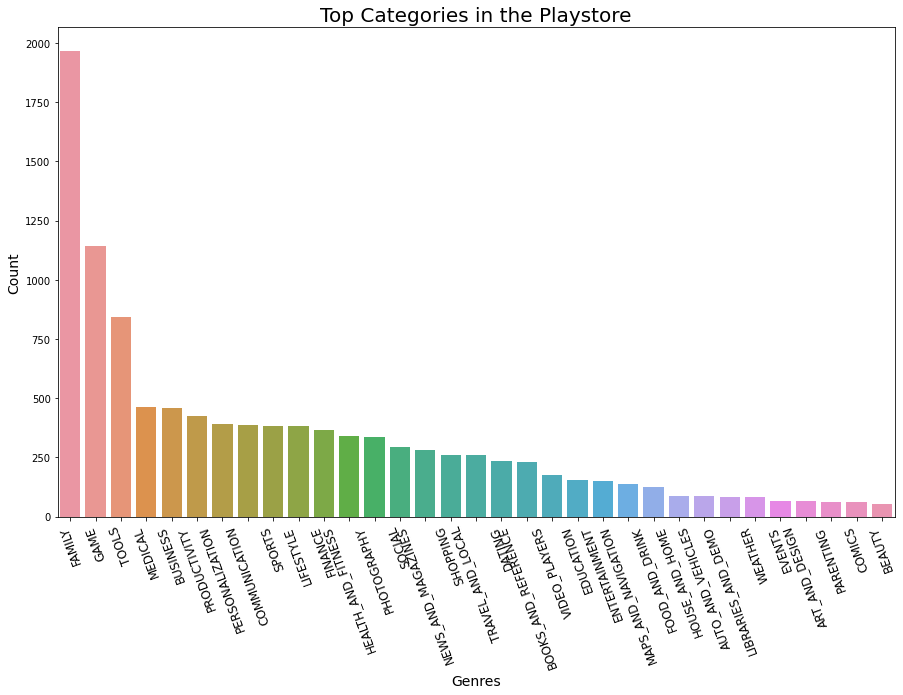

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Count',fontsize=14)
plt.xlabel('Genres',fontsize=14)
graph = sns.barplot(x=a,y=b)
graph.set_xticklabels(graph.get_xticklabels(), rotation=110, fontsize=12)
graph.set_title("Top Categories in the Playstore", fontsize = 20);

From this data  we can conclude the top category of app is family on Playstore

**Lets find out Top genres in Play Store review data**

In [ ]:
not_null_df1.Genres.unique() #to get unique genres column

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
len(not_null_df1.Genres.unique()) # to check the length of unique geners

119

In [ ]:
pd.crosstab(not_null_df1.Genres,not_null_df1.Genres.count()) #it count and return the shortest value


col_0,10829
Genres,
Action,365
Action;Action & Adventure,17
Adventure,75
Adventure;Action & Adventure,13
Adventure;Brain Games,1
...,...
Video Players & Editors,173
Video Players & Editors;Creativity,2
Video Players & Editors;Music & Video,3


In [ ]:
top_genres = not_null_df1['Genres'].value_counts().head(50) #to get the top 50 geners

In [ ]:
top_genres

Tools                          840
Entertainment                  622
Education                      548
Medical                        463
Business                       460
Productivity                   424
Sports                         398
Personalization                390
Communication                  387
Lifestyle                      381
Finance                        366
Action                         365
Health & Fitness               341
Photography                    335
Social                         295
News & Magazines               283
Shopping                       260
Travel & Local                 257
Dating                         234
Books & Reference              230
Arcade                         220
Simulation                     200
Casual                         193
Video Players & Editors        173
Puzzle                         139
Maps & Navigation              137
Food & Drink                   127
Role Playing                   109
Strategy            

In [ ]:
a = []
b = []

for i in range(len(top_genres)):
    a.append(top_genres.index[i]) #appending geners to list "a"
    b.append(top_genres[i]) #appending number of apps belonging to geners

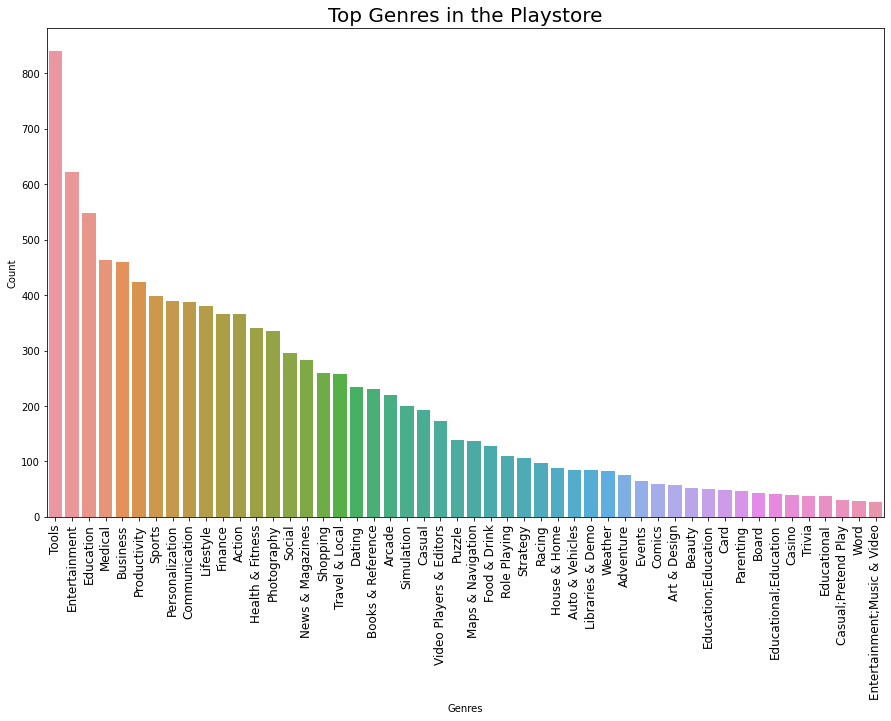

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Count')
plt.xlabel('Genres')
graph = sns.barplot(x=a,y=b) #to plot bar chart
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20); #title of graph

##From the above data we can conclude that highest number of apps found in tools and second highest number in entertainment


In [ ]:
apps_by_rating=not_null_df1['Rating'].value_counts

In [ ]:
apps_by_rating

<bound method IndexOpsMixin.value_counts of 0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10829, dtype: float64>

**Q2. let's find out maximum content rating.**

In [ ]:
#In order to find the most frequent content rating in play store 
most_frequent_rating=not_null_df1['Content Rating'].value_counts
most_frequent_rating

<bound method IndexOpsMixin.value_counts of 0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10829, dtype: object>

In [ ]:
most_frequent_rating=not_null_df1['Content Rating'].mode()
most_frequent_rating

0    Everyone
dtype: object

In [ ]:
print(f'The most frequent content rating for play store app: {most_frequent_rating[0]}')

The most frequent content rating for play store app: Everyone


In [ ]:
df_new=pd.DataFrame(not_null_df1.groupby('Content Rating')['Installs'].count().reset_index()) #grouping the data by "content rating" & counting number of installs based on geners
df_new

,Content Rating,Installs
0,Adults only 18+,3
1,Everyone,8704
2,Everyone 10+,413
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


In [ ]:
fig = px.bar(df_new, x='Content Rating',y='Installs',title='Category vs Installs',color='Content Rating') #bar plotting
fig.show()

From this datavisualization we can conclude that most of the application installs has a content rating of 'Everyone'

### ***4. What portion of the apps in playstore are paid and free?***

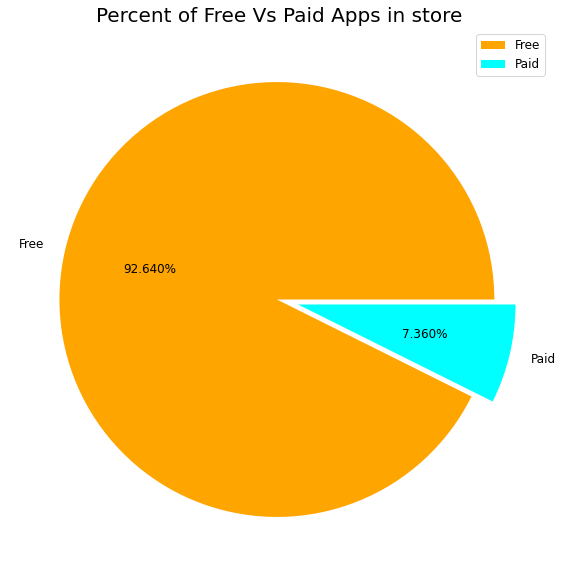

In [ ]:
# using piechart from matpltlib to determine the percentage of free vs paid apps from playstore data
plt.figure(figsize=(10,10))
labels = not_null_df1['Type'].value_counts(sort = True).index
sizes = not_null_df1['Type'].value_counts(sort = True)
colors = ["orange","cyan"]
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 12
explode = (0.2,0)
plt.pie(sizes, explode= [0.01,0.09],labels=labels, colors=colors, autopct="%.3f%%")
plt.title('Percent of Free Vs Paid Apps in store',fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Graph Analysis:
from the above chart we can conclude that most of the apps available on the playstore are free

1. Free Apps= 92.640%
2. Paid Apps= 7.360% 

**Q8. Let us experience the effect of last update on rating**

In [ ]:
#extracting year part from last updated column
not_null_df1['year']= not_null_df1['Last Updated'].dt.strftime('%Y')
not_null_df1['year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: year, Length: 10829, dtype: object

In [ ]:
#group by year for number of rating in each year
date_df=not_null_df1.groupby('year')['Rating'].count().reset_index()
date_df

,year,Rating
0,2010,1
1,2011,15
2,2012,26
3,2013,109
4,2014,209
5,2015,459
6,2016,802
7,2017,1864
8,2018,7344


In [ ]:
#using plotly to describe rating vs year distribution 
fig = px.bar(date_df, x='year',y='Rating',title='Ratings vs Year',color='Rating')
fig.show()


**How does the last update has an effect on the trend of rating?**

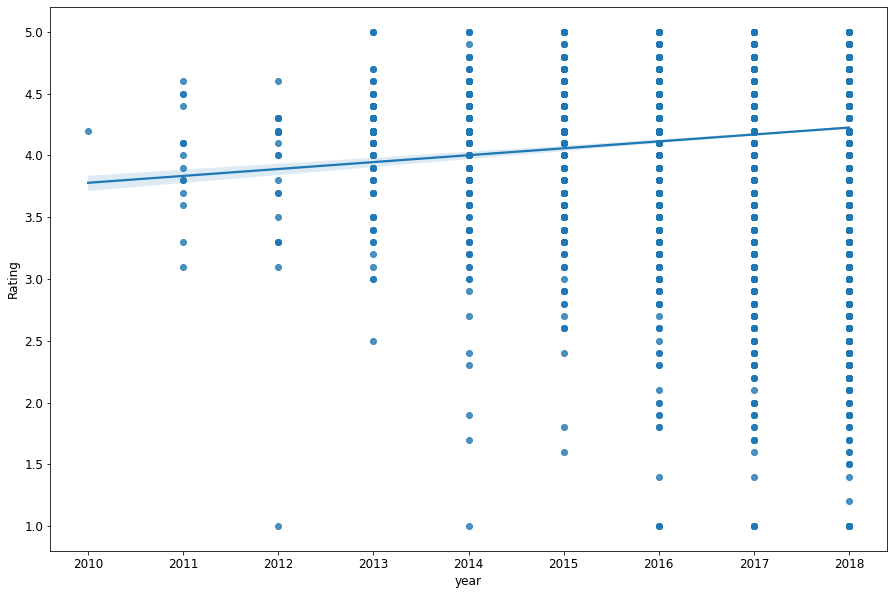

In [ ]:
fig=plt.figure(figsize=(15,10))
not_null_df1['year']=not_null_df1['year'].astype('int64')
sns.regplot(data=not_null_df1,x='year',y='Rating')

##From this graph we can conclude that rating is increasing in a proprotinate manner with the last updated time.So from this we can be sure that with the latest updatation the reviewers are giving better rating.

**Effect on rating when the application was of type 'paid'**

In [ ]:
not_null_df1.head(100)


,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_KB,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2867.2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.4,2680,2.2M,500000,Free,Everyone,Auto & Vehicles,2018-03-20,1.03,4.0.3 and up,2252.8,2018
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288,4.5M,100000,Free,Everyone,Auto & Vehicles,2018-04-21,2.17,4.0 and up,4608.0,2018
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17M,500000,Free,Everyone,Beauty,2018-08-02,6.10.1,5.0 and up,17408.0,2018
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,Everyone,Beauty,2017-11-09,2.3.0,4.1 and up,14336.0,2017


In [ ]:
type_df=pd.DataFrame(not_null_df1.groupby(['Rating','Type'])['Type'].count().unstack())
type_df.fillna(0)

type_df

Type,Free,Paid
Rating,,
1.000000,14.0,2.0
1.200000,1.0,NaN
1.400000,3.0,NaN
1.500000,3.0,NaN
1.600000,4.0,NaN
1.700000,7.0,1.0
1.800000,7.0,1.0
1.900000,13.0,NaN
2.000000,11.0,1.0


In [ ]:
type_df.columns

Index(['Free', 'Paid'], dtype='object', name='Type')

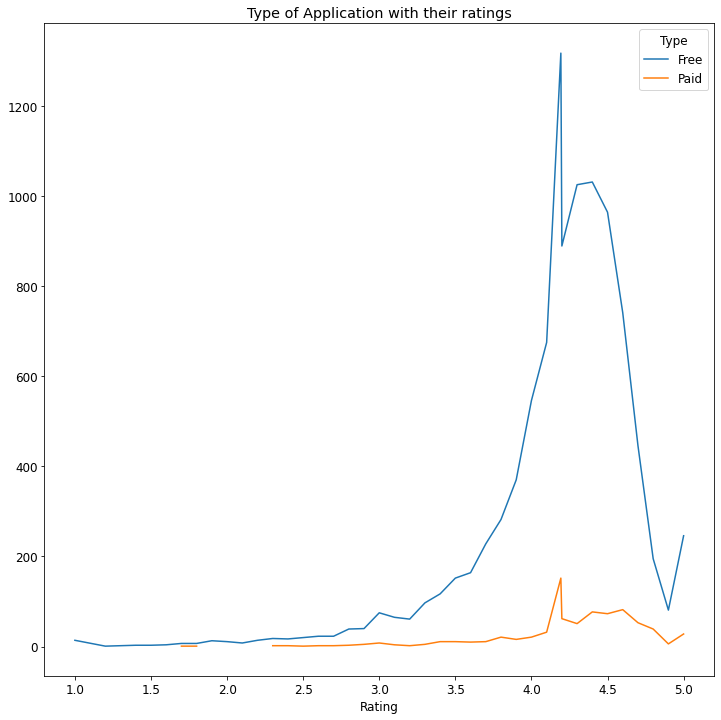

In [ ]:
type_df.plot(kind='line')
plt.title('Type of Application with their ratings')
plt.xlabel('Rating')

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
type_df.reset_index(inplace=True)

Same thing we can do it with plotly

In [ ]:
type_df_melt=type_df.melt(id_vars=['Rating'],var_name='Type',value_name='count')

In [ ]:
type_df_melt

,Rating,Type,count
0,1.0,Free,14.0
1,1.2,Free,1.0
2,1.4,Free,3.0
3,1.5,Free,3.0
4,1.6,Free,4.0
...,...,...,...
75,4.6,Paid,82.0
76,4.7,Paid,53.0
77,4.8,Paid,39.0
78,4.9,Paid,6.0


In [ ]:
fig2=px.line(type_df_melt,x='Rating',y='count',color='Type',title='Type of Application with their ratings',width=800, height=400)
fig2.show()

**Findings**:
1. From this graph we can analyse that the Applications which are paid has less ratings in terms of number and ratings as well

  From this data visualization we can conclude with the latest update no. of    ratings increases

**Q9. Lets find out relation between reviews and rating**

In [ ]:
not_null_df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_KB,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2867.2,2018


In [ ]:
df_new2=not_null_df1.groupby('Reviews')['Rating'].count().reset_index()

In [ ]:
df_new2

,Reviews,Rating
0,0,594
1,1,271
2,2,214
3,3,175
4,4,137
...,...,...
5994,66577446,1
5995,69109672,1
5996,69119316,2
5997,78128208,1


##**Description for User Review**:
1. **App**:- Type of Applications
2. **Translated_Review**:- Reviews being given by consumer
3. **Sentiment**:- Sentiment of trust from customer  
4. **Sentiment_Polarity**:- It determines sentimental expresion of the customer's opinion
5. **Sentiment_Subjectivity**:- Sentimental Subjectivity in terms is a personal,opinion and it fall in range [0,1]. 

##**Let's do some Data cleaning on User Review Dataset which is df2**

In [ ]:
user_df.head(45)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
user_df['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
not_null_df2=user_df.dropna()

In [ ]:
not_null_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
not_null_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Size            10829 non-null  object        
 5   Installs        10829 non-null  int64         
 6   Type            10829 non-null  object        
 7   Content Rating  10829 non-null  object        
 8   Genres          10829 non-null  object        
 9   Last Updated    10829 non-null  datetime64[ns]
 10  Current Ver     10829 non-null  object        
 11  Android Ver     10829 non-null  object        
 12  Size_in_KB      10829 non-null  float64       
 13  year            10829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)


In [ ]:
not_null_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


##**Lets merge the two dataframes**

In [ ]:
#copying the data from not_null_df1 to dataframe 'play_new_df'.
play_new_df=not_null_df1.copy()
#copying the data from not_null_df2 to dataframe 'user_new_df'.
user_new_df=not_null_df2.copy()

In [ ]:
# merging two dataframes 'play_new_df' and 'user_new_df' with inner join as new dataframe 'play_user_df'.
play_user_df = pd.merge(play_new_df, user_new_df, how='inner', left_on='App', right_on='App')

**Let's find the sentiments subjectivity**

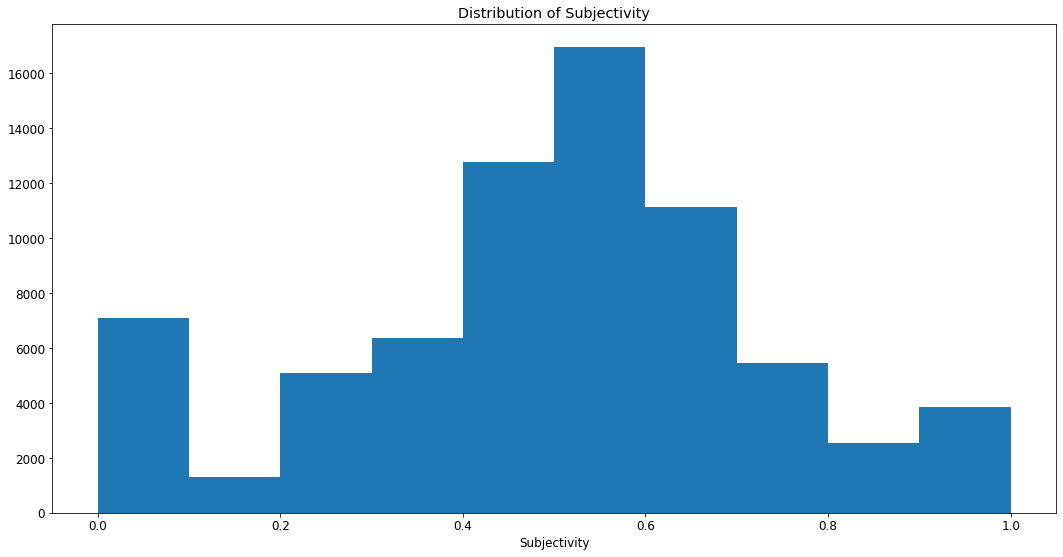

In [ ]:
#creating histogram of 'Sentiment_Subjectivity' using matplotlib.
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(play_user_df[play_user_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

**Findings:**

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.



##**Let's see the different percentages of review sentiments based on two datasets** 

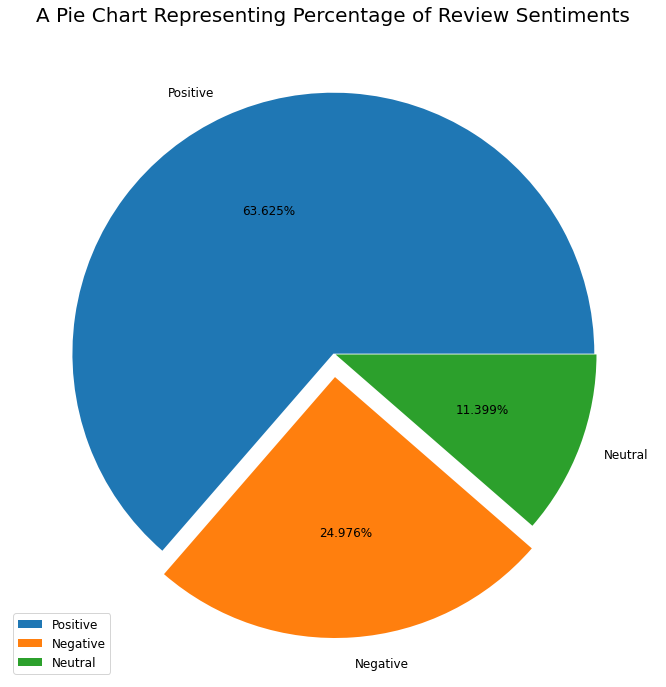

In [ ]:
counts = list(play_user_df['Sentiment'].value_counts()) #counts
labels = 'Positive', 'Negative','Neutral' #reviews
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12,12)
plt.pie(counts, labels=labels, explode=[0, 0.09, 0.009], autopct="%.3f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

**Findings:**

Positive are 63.625%

Negative are 24.976%

Neutral are 11.399%


In [ ]:
play_user_df.head() #to read the date frame from top

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_KB,year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,2018,I hate,Negative,-0.800,0.900000


In [ ]:
#Most app with Translated review
app_df1=pd.DataFrame(play_user_df.groupby(['App','Category'])['Translated_Review'].count().reset_index())
app_df1

,App,Category,Translated_Review
0,10 Best Foods for You,HEALTH_AND_FITNESS,388
1,11st,SHOPPING,39
2,1800 Contacts - Lens Store,MEDICAL,160
3,1LINE – One Line with One Touch,GAME,38
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,32
...,...,...,...
843,Hotels.com: Book Hotel Rooms & Find Vacation D...,TRAVEL_AND_LOCAL,136
844,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,34
845,Hotstar,ENTERTAINMENT,32
846,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,33


In [ ]:
app_df1.sort_values(by=['Translated_Review'],ascending=False,inplace=True)
app_df1.head(10)

,App,Category,Translated_Review
243,Bowmasters,GAME,1872
800,Helix Jump,GAME,1638
276,"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,1536
319,Candy Crush Saga,GAME,1440
112,Angry Birds Classic,GAME,1365
19,8 Ball Pool,GAME,1314
311,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,1270
489,Duolingo: Learn Languages Free,EDUCATION,960
699,Garena Free Fire,GAME,888
735,Google Photos,PHOTOGRAPHY,764


###From this analysis we noticed that top 4 of the translated_review are given to Bowmaster,Helix Jump,CBS Sports App - Scores, News, Stats & Watch Live,Candy Crush Saga etc and most of the reviewed app are from GAME category

## **Let's do sentiment analysis on different top app category**

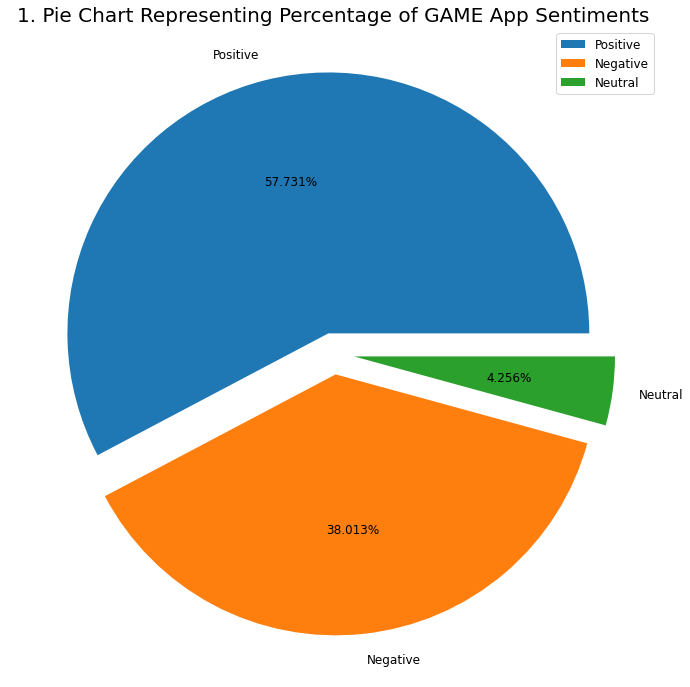

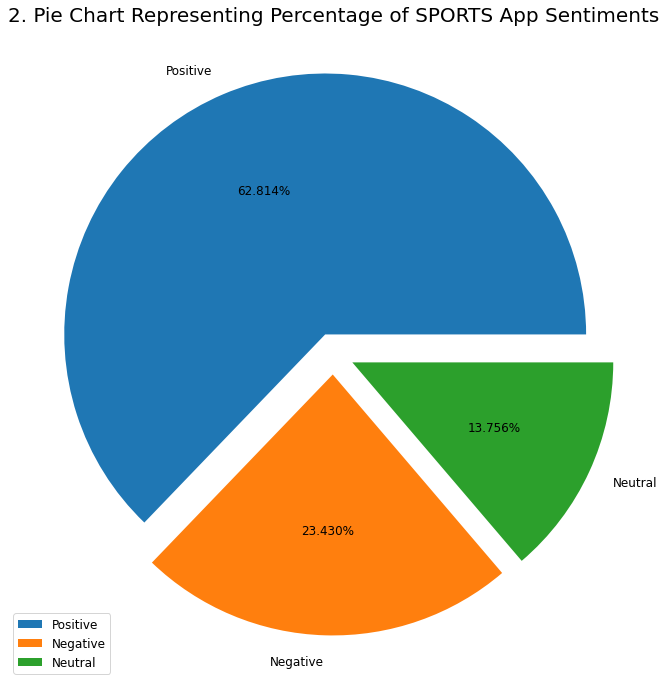

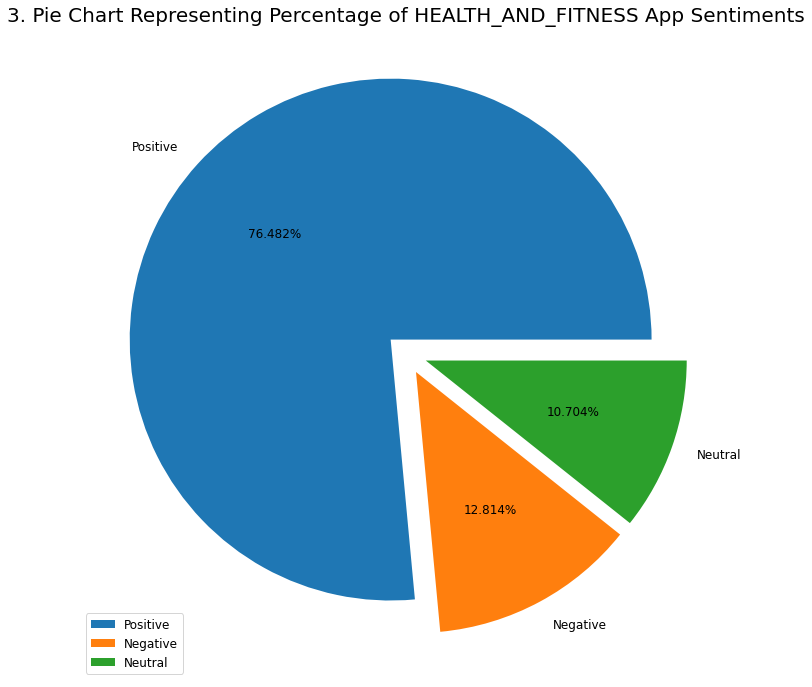

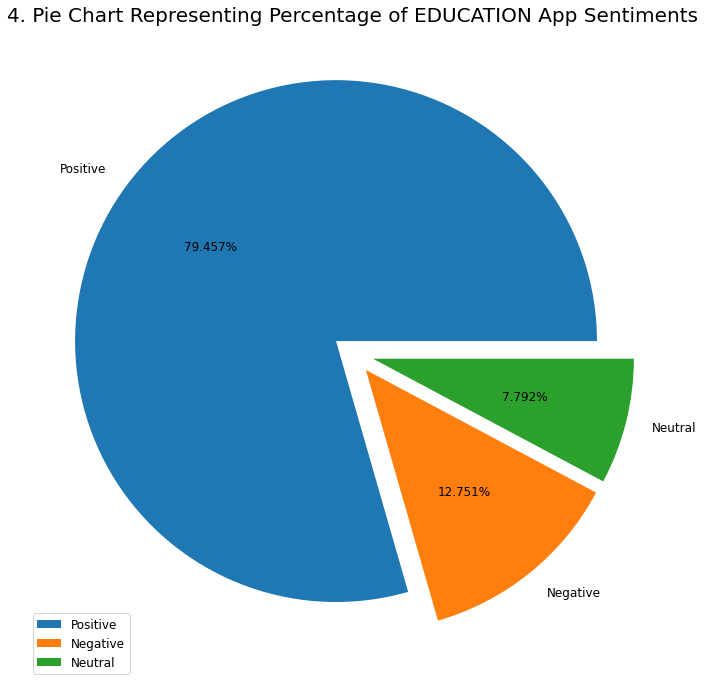

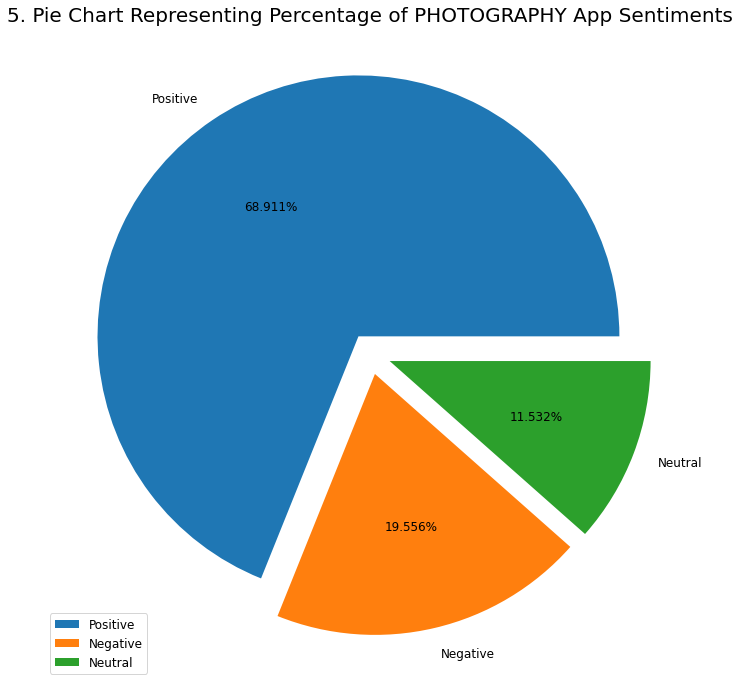

In [ ]:

a=['GAME','SPORTS','HEALTH_AND_FITNESS','EDUCATION','PHOTOGRAPHY']

for el in a:
  sent_analysis_df=play_user_df[play_user_df['Category']==el]


  s_count = list(sent_analysis_df['Sentiment'].value_counts())
  labels = 'Positive', 'Negative','Neutral'
  plt.rcParams['font.size'] = 12
  plt.rcParams['figure.figsize'] = (12,12)
  plt.pie(s_count, labels=labels, explode=[0.08, 0.08, 0.08], autopct="%.3f%%")
  plt.title(f'{a.index(el)+1}. Pie Chart Representing Percentage of {el} App Sentiments', fontsize=20)
  plt.axis('off')
  plt.legend()
  plt.show()


1. From the above figure we conclude that best positive sentiment is recieved by the Education App with a positive percentage of 79.457.
2. Also we found that top translated review App Category **GAME** has less positive sentiment then it's competitor **SPORTS**.
3. Most negative sentiments from the top translated app category has been recieved by GAME CATEGORY THIS shows that even if GAME app has the highest translated reviews but in positive sentiment it is low.
4. Highest percentages of neutral sentiments has been claimed by SPORTS category from the list top 5 App category.  

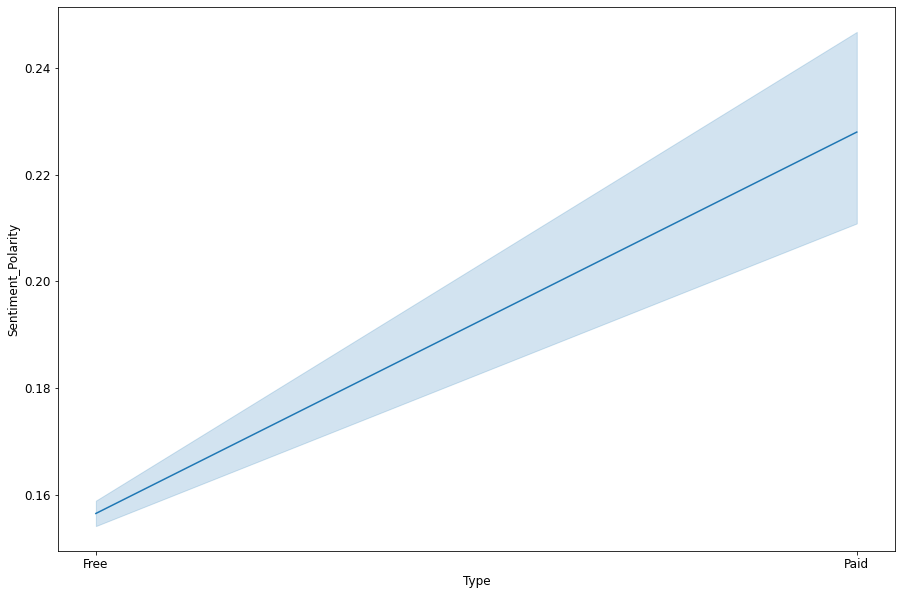

In [ ]:
new_df=play_user_df[['Type','Sentiment_Polarity']] #creating new data frame using 'Type','Sentiment_Polarity' from play_user_df
fig=plt.figure(figsize=(15,10))
sns.lineplot(data=new_df,x='Type',y='Sentiment_Polarity') #creating line plot between 'Type','Sentiment_Polarity'
# sns.barplot(data=new_df,x='Type',y='Sentiment_Polarity')

From the above line plot we can conclude that with increase in sentiment polarity ,the sentiment polarity for the paid app is higher than the sentiment polarity for free aap.